In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
# 2. Load Your Dataset
df = pd.read_csv(r"C:\Users\R Y Z E N\Desktop\House Price Prediction Dataset.csv")

# 3. Preview the Data
print("Shape:", df.shape)
print("\nColumns:", df.columns)
df.head()


Shape: (2000, 10)

Columns: Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
# Remove duplicates (if any)
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


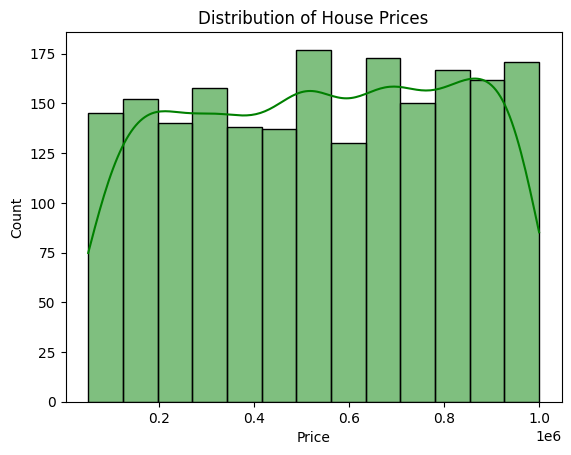

In [4]:
sns.histplot(df['Price'], kde=True, color='green')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.show()


In [5]:
#4 Fix 'Garage' column to be numeric (in case it's still string)
if df['Garage'].dtype == object:
    df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})


In [6]:
#  Step 5: Select features & target
features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage']
target = 'Price'

X = df[features]
y = df[target]

#  Step 6: One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Location', 'Condition'], drop_first=True)

In [7]:
#  Step 7: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 10. Train Models
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)


Linear Regression:
  MAE: 243241.98
  RMSE: 279859.73

Gradient Boosting:
  MAE: 245445.60
  RMSE: 284015.46



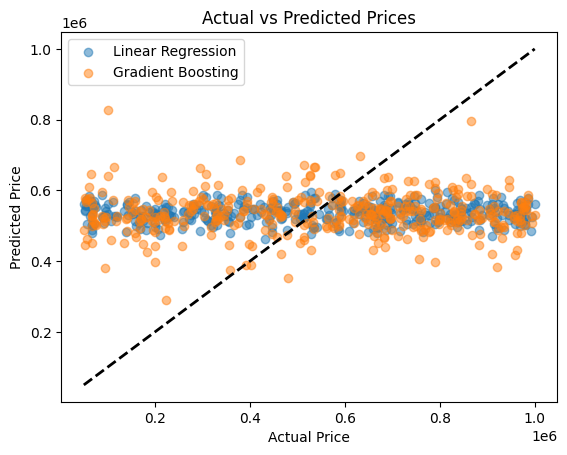

In [9]:
# 11. Evaluation
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name}:\n  MAE: {mae:.2f}\n  RMSE: {rmse:.2f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Gradient Boosting", y_test, y_pred_gbr)

# 12. Plot Actual vs Predicted
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label="Gradient Boosting")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()